In [ ]:
pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download web-traffic-time-series-forecasting

 85% 58.0M/68.2M [00:00<00:00, 55.7MB/s]
100% 68.2M/68.2M [00:00<00:00, 93.3MB/s]
 89% 90.0M/101M [00:00<00:00, 111MB/s]
100% 101M/101M [00:00<00:00, 115MB/s] 
 86% 88.0M/102M [00:01<00:00, 102MB/s] 
100% 102M/102M [00:01<00:00, 95.8MB/s]
 99% 148M/150M [00:01<00:00, 161MB/s]
100% 150M/150M [00:01<00:00, 144MB/s]
 83% 55.0M/66.0M [00:00<00:00, 94.8MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s] 
 93% 89.0M/96.0M [00:00<00:00, 141MB/s]
100% 96.0M/96.0M [00:00<00:00, 150MB/s]


In [ ]:
! unzip key_1.csv.zip
! unzip key_2.csv.zip
! unzip train_1.csv.zip
! unzip train_2.csv.zip

Archive:  key_1.csv.zip
  inflating: key_1.csv               
Archive:  key_2.csv.zip
  inflating: key_2.csv               
Archive:  train_1.csv.zip
  inflating: train_1.csv             
Archive:  train_2.csv.zip
  inflating: train_2.csv             


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train_1.csv')

In [ ]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
train["Page"]= train["Page"].str.split(".wikipedia.org_", n = 1, expand = True)
train["locale"] = train["Page"].str.slice(-2,)
train["locale"] = pd.get_dummies(train["locale"])

In [ ]:
train = train.drop(["Page"],axis=1)

In [ ]:
train

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,...,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,locale
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,...,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,...,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,...,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,...,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0,es
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
row = train.iloc[1,:].values

In [ ]:
row

array([11.0, 14.0, 15.0, 18.0, 11.0, 13.0, 22.0, 11.0, 10.0, 4.0, 41.0,
       65.0, 57.0, 38.0, 20.0, 62.0, 44.0, 15.0, 10.0, 47.0, 24.0, 17.0,
       22.0, 9.0, 39.0, 13.0, 11.0, 12.0, 21.0, 19.0, 9.0, 15.0, 33.0,
       8.0, 8.0, 7.0, 13.0, 2.0, 23.0, 12.0, 27.0, 27.0, 36.0, 23.0, 58.0,
       80.0, 60.0, 69.0, 42.0, 161.0, 94.0, 77.0, 78.0, 20.0, 24.0, 13.0,
       14.0, 26.0, 8.0, 82.0, 22.0, 11.0, 81.0, 37.0, 9.0, 40.0, 47.0,
       18.0, 23.0, 6.0, 2.0, 7.0, 16.0, 10.0, 34.0, 14.0, 31.0, 20.0,
       23.0, 14.0, 16.0, 34.0, 15.0, 30.0, 13.0, 30.0, 15.0, 25.0, 17.0,
       8.0, 12.0, 17.0, 10.0, 21.0, 18.0, 30.0, 13.0, 7.0, 15.0, 23.0,
       20.0, 15.0, 9.0, 47.0, 14.0, 11.0, 16.0, 12.0, 7.0, 15.0, 14.0,
       12.0, 18.0, 29.0, 39.0, 11.0, 14.0, 28.0, 17.0, 20.0, 17.0, 36.0,
       13.0, 11.0, 14.0, 14.0, 14.0, 33.0, 14.0, 13.0, 18.0, 13.0, 11.0,
       8.0, 10.0, 11.0, 81.0, 14.0, 20.0, 6.0, 16.0, 18.0, 9.0, 12.0,
       10.0, 8.0, 11.0, 14.0, 47.0, 13.0, 13.0, 6.0, 10.0, 8.0,

In [ ]:
X = row[0:549]
y = row[1:550]


In [ ]:
X

array([11.0, 14.0, 15.0, 18.0, 11.0, 13.0, 22.0, 11.0, 10.0, 4.0, 41.0,
       65.0, 57.0, 38.0, 20.0, 62.0, 44.0, 15.0, 10.0, 47.0, 24.0, 17.0,
       22.0, 9.0, 39.0, 13.0, 11.0, 12.0, 21.0, 19.0, 9.0, 15.0, 33.0,
       8.0, 8.0, 7.0, 13.0, 2.0, 23.0, 12.0, 27.0, 27.0, 36.0, 23.0, 58.0,
       80.0, 60.0, 69.0, 42.0, 161.0, 94.0, 77.0, 78.0, 20.0, 24.0, 13.0,
       14.0, 26.0, 8.0, 82.0, 22.0, 11.0, 81.0, 37.0, 9.0, 40.0, 47.0,
       18.0, 23.0, 6.0, 2.0, 7.0, 16.0, 10.0, 34.0, 14.0, 31.0, 20.0,
       23.0, 14.0, 16.0, 34.0, 15.0, 30.0, 13.0, 30.0, 15.0, 25.0, 17.0,
       8.0, 12.0, 17.0, 10.0, 21.0, 18.0, 30.0, 13.0, 7.0, 15.0, 23.0,
       20.0, 15.0, 9.0, 47.0, 14.0, 11.0, 16.0, 12.0, 7.0, 15.0, 14.0,
       12.0, 18.0, 29.0, 39.0, 11.0, 14.0, 28.0, 17.0, 20.0, 17.0, 36.0,
       13.0, 11.0, 14.0, 14.0, 14.0, 33.0, 14.0, 13.0, 18.0, 13.0, 11.0,
       8.0, 10.0, 11.0, 81.0, 14.0, 20.0, 6.0, 16.0, 18.0, 9.0, 12.0,
       10.0, 8.0, 11.0, 14.0, 47.0, 13.0, 13.0, 6.0, 10.0, 8.0,

In [ ]:
y

array([14.0, 15.0, 18.0, 11.0, 13.0, 22.0, 11.0, 10.0, 4.0, 41.0, 65.0,
       57.0, 38.0, 20.0, 62.0, 44.0, 15.0, 10.0, 47.0, 24.0, 17.0, 22.0,
       9.0, 39.0, 13.0, 11.0, 12.0, 21.0, 19.0, 9.0, 15.0, 33.0, 8.0, 8.0,
       7.0, 13.0, 2.0, 23.0, 12.0, 27.0, 27.0, 36.0, 23.0, 58.0, 80.0,
       60.0, 69.0, 42.0, 161.0, 94.0, 77.0, 78.0, 20.0, 24.0, 13.0, 14.0,
       26.0, 8.0, 82.0, 22.0, 11.0, 81.0, 37.0, 9.0, 40.0, 47.0, 18.0,
       23.0, 6.0, 2.0, 7.0, 16.0, 10.0, 34.0, 14.0, 31.0, 20.0, 23.0,
       14.0, 16.0, 34.0, 15.0, 30.0, 13.0, 30.0, 15.0, 25.0, 17.0, 8.0,
       12.0, 17.0, 10.0, 21.0, 18.0, 30.0, 13.0, 7.0, 15.0, 23.0, 20.0,
       15.0, 9.0, 47.0, 14.0, 11.0, 16.0, 12.0, 7.0, 15.0, 14.0, 12.0,
       18.0, 29.0, 39.0, 11.0, 14.0, 28.0, 17.0, 20.0, 17.0, 36.0, 13.0,
       11.0, 14.0, 14.0, 14.0, 33.0, 14.0, 13.0, 18.0, 13.0, 11.0, 8.0,
       10.0, 11.0, 81.0, 14.0, 20.0, 6.0, 16.0, 18.0, 9.0, 12.0, 10.0,
       8.0, 11.0, 14.0, 47.0, 13.0, 13.0, 6.0, 10.0, 8.0, 8.0, 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [ ]:
X_train

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg = XGBRegressor()

In [ ]:
xg.fit(X_train, y_train)

[18:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
X_test = np.reshape(X_test,(-1,1))
X_test = sc.transform(X_test)

In [ ]:
y_pred_xg = xg.predict(X_test)

In [ ]:
y_pred_xg

In [ ]:
y_test = np.reshape(y_test,(-1,1))
y_test = sc.transform(y_test)

In [ ]:
accuracy = xg.score(X_test, y_test)

In [ ]:
accuracy

-0.08119189394474291

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred_xg)

In [ ]:
rms

In [ ]:
import pandas as pd
train_n = pd.read_csv('/content/train_1.csv')

In [ ]:
train_n = train_n[1:10000]

In [ ]:
train_flattened = pd.melt(train_n[list(train_n.columns[-530:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [ ]:
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [ ]:
train_flattened.reset_index(drop=False,inplace=True)
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

In [ ]:
train_flattened

,Page,date,Visits,weekend,mean,median,weekday,year,month,day
0,!vote_en.wikipedia.org_desktop_all-agents,2015-07-21,5.0,0.0,3.297244,3.0,1,2015,7,21
1,!vote_en.wikipedia.org_desktop_all-agents,2015-07-22,8.0,0.0,3.297244,3.0,2,2015,7,22
2,!vote_en.wikipedia.org_desktop_all-agents,2015-07-23,4.0,0.0,3.297244,3.0,3,2015,7,23
3,!vote_en.wikipedia.org_desktop_all-agents,2015-07-24,1.0,0.0,3.297244,3.0,4,2015,7,24
4,!vote_en.wikipedia.org_desktop_all-agents,2015-07-25,1.0,1.0,3.297244,3.0,5,2015,7,25
...,...,...,...,...,...,...,...,...,...,...
5299465,龔嘉欣_zh.wikipedia.org_all-access_spider,2016-12-27,18.0,0.0,15.345283,10.0,1,2016,12,27
5299466,龔嘉欣_zh.wikipedia.org_all-access_spider,2016-12-28,37.0,0.0,15.345283,10.0,2,2016,12,28
5299467,龔嘉欣_zh.wikipedia.org_all-access_spider,2016-12-29,62.0,0.0,15.345283,10.0,3,2016,12,29
5299468,龔嘉欣_zh.wikipedia.org_all-access_spider,2016-12-30,13.0,0.0,15.345283,10.0,4,2016,12,30


In [ ]:
train_flattened["Page"]= train_flattened["Page"].str.split(".wikipedia.org_", n = 1, expand = True)
train_flattened["locale"] = train_flattened["Page"].str.slice(-2,)
#train_flattened["locale"] =
pd.get_dummies(train_flattened["locale"])
#pd.get_dummies(train_flattened["locale"])
train_flattened = train_flattened.join(pd.get_dummies(train_flattened["locale"]))
train_flattened

,Page,date,Visits,weekend,mean,median,weekday,year,month,day,locale,en,fr,zh
0,!vote_en,2015-07-21,5.0,0.0,3.297244,3.0,1,2015,7,21,en,1,0,0
1,!vote_en,2015-07-22,8.0,0.0,3.297244,3.0,2,2015,7,22,en,1,0,0
2,!vote_en,2015-07-23,4.0,0.0,3.297244,3.0,3,2015,7,23,en,1,0,0
3,!vote_en,2015-07-24,1.0,0.0,3.297244,3.0,4,2015,7,24,en,1,0,0
4,!vote_en,2015-07-25,1.0,1.0,3.297244,3.0,5,2015,7,25,en,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299465,龔嘉欣_zh,2016-12-27,18.0,0.0,15.345283,10.0,1,2016,12,27,zh,0,0,1
5299466,龔嘉欣_zh,2016-12-28,37.0,0.0,15.345283,10.0,2,2016,12,28,zh,0,0,1
5299467,龔嘉欣_zh,2016-12-29,62.0,0.0,15.345283,10.0,3,2016,12,29,zh,0,0,1
5299468,龔嘉欣_zh,2016-12-30,13.0,0.0,15.345283,10.0,4,2016,12,30,zh,0,0,1


In [ ]:
train_flattened = train_flattened.dropna()

In [ ]:
train_flattened.drop(["Page"],axis=1)

,date,Visits,weekend,mean,median,weekday,year,month,day,locale,en,fr,zh
0,2015-07-21,5.0,0.0,3.297244,3.0,1,2015,7,21,en,1,0,0
1,2015-07-22,8.0,0.0,3.297244,3.0,2,2015,7,22,en,1,0,0
2,2015-07-23,4.0,0.0,3.297244,3.0,3,2015,7,23,en,1,0,0
3,2015-07-24,1.0,0.0,3.297244,3.0,4,2015,7,24,en,1,0,0
4,2015-07-25,1.0,1.0,3.297244,3.0,5,2015,7,25,en,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299465,2016-12-27,18.0,0.0,15.345283,10.0,1,2016,12,27,zh,0,0,1
5299466,2016-12-28,37.0,0.0,15.345283,10.0,2,2016,12,28,zh,0,0,1
5299467,2016-12-29,62.0,0.0,15.345283,10.0,3,2016,12,29,zh,0,0,1
5299468,2016-12-30,13.0,0.0,15.345283,10.0,4,2016,12,30,zh,0,0,1


In [ ]:
y_n = train_flattened["Visits"]

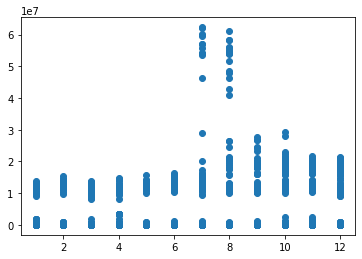

In [ ]:
plt.scatter(train_flattened["month"], y_n)

In [ ]:
y_n

0           5.0
1           8.0
2           4.0
3           1.0
4           1.0
           ... 
5299465    18.0
5299466    37.0
5299467    62.0
5299468    13.0
5299469    22.0
Name: Visits, Length: 4911277, dtype: float64

In [ ]:
X_n = train_flattened.drop(["date","Visits","Page","locale","year"], axis=1)

In [99]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 0)

In [100]:
X_train_n

,weekend,mean,median,weekday,month,day,en,fr,zh
2718936,0.0,1536.962264,1483.5,2,8,26,0,1,0
3268275,0.0,16.558491,12.0,2,5,11,0,0,1
4374714,0.0,101.598113,56.0,4,10,23,0,0,1
3270515,0.0,43.900000,33.0,3,9,8,0,0,1
4804280,0.0,19.052830,19.0,4,7,15,0,0,1
...,...,...,...,...,...,...,...,...,...
2345389,0.0,513.064151,480.0,0,12,7,0,1,0
2376913,0.0,2109.322642,1782.5,2,8,17,1,0,0
2340406,0.0,322.630189,7.0,2,10,19,1,0,0
1579331,0.0,562.035849,439.0,0,10,24,0,1,0


In [101]:

y_train_n

2718936    947.0
3268275     23.0
4374714     35.0
3270515     29.0
4804280     22.0
           ...  
2345389    687.0
2376913    223.0
2340406      8.0
1579331    610.0
4846824      8.0
Name: Visits, Length: 3929021, dtype: float64

In [102]:
X_test_n

,weekend,mean,median,weekday,month,day,en,fr,zh
2085688,1.0,1026.626415,729.5,6,12,6,0,1,0
4508075,1.0,21.983240,5.0,6,9,18,0,0,1
2397623,0.0,827.745283,764.0,0,9,26,0,1,0
4510318,1.0,6.771698,6.0,5,8,8,0,0,1
503721,1.0,549.598113,434.5,5,2,27,0,1,0
...,...,...,...,...,...,...,...,...,...
5252694,0.0,12.679245,10.0,3,8,18,0,0,1
2748776,0.0,301.861035,150.0,1,2,2,0,1,0
231156,0.0,323.764151,222.5,0,10,5,0,1,0
3255795,1.0,21.533962,19.0,6,7,26,0,0,1


In [103]:
y_test_n 

2085688     750.0
4508075       1.0
2397623     569.0
4510318      12.0
503721      404.0
            ...  
5252694      11.0
2748776     231.0
231156     1287.0
3255795      20.0
2338246     110.0
Name: Visits, Length: 982256, dtype: float64

In [ ]:
xg.fit(X_train_n, y_train_n)

In [104]:
y_pred_xg = xg.predict(X_test_n)

In [105]:
y_pred_xg = pd.Series(y_pred_xg)
y_pred_xg[y_pred_xg<0] = 0
y_pred_xg

0          886.684692
1            0.000000
2          879.909119
3            0.000000
4          569.379883
             ...     
982251      21.768885
982252     374.784302
982253     371.951782
982254       0.000000
982255    1567.119019
Length: 982256, dtype: float32

In [106]:
y_test_n 

2085688     750.0
4508075       1.0
2397623     569.0
4510318      12.0
503721      404.0
            ...  
5252694      11.0
2748776     231.0
231156     1287.0
3255795      20.0
2338246     110.0
Name: Visits, Length: 982256, dtype: float64

In [107]:
y_test_n.head(10)

2085688     750.0
4508075       1.0
2397623     569.0
4510318      12.0
503721      404.0
1648050    3311.0
2568903     632.0
259285     1501.0
4576233      11.0
2130662      63.0
Name: Visits, dtype: float64

In [108]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test_n, y_pred_xg))


77622.34599161414

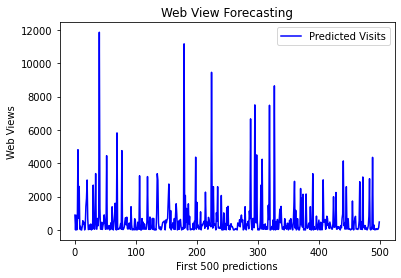

In [118]:
plt.figure
#plt.plot(y_test_n[0:500], color = 'red', label = 'Actual Visits')
plt.plot(y_pred_xg[0:500],color = 'blue', label = 'Predicted Visits')
plt.title('Web View Forecasting')
plt.xlabel('First 500 predictions')
plt.ylabel('Web Views')
plt.legend()
plt.show()

In [ ]:
accuracy = xg.score(X_test_n, y_test_n)

In [ ]:
accuracy

0.8001653220595899

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_n, y_train_n)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_n)

In [ ]:
rms = mean_squared_error(y_test_n, y_pred_lr)

In [ ]:
rms

6130047282.913652

In [ ]:
import numpy as np
import math
MSE = np.square(np.subtract(y_test_n, y_pred_lr)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

78294.6184799032


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
lr.score(X_test_n, y_test_n)

0.7966888745049071

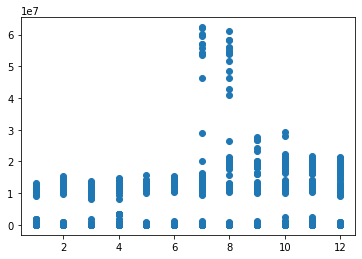

In [ ]:
plt.scatter(X_train_n["month"], y_train_n)

In [ ]:
import statsmodels.api 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test_n, y_pred_lr)

0.7966888745049071